# Analysis for Continuous Improvement

Author Name: Alexander Miroshnichenko

9-digit PID: "730477260"

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. There should be an accelerated course for people with prior experience. 
2. There should be no written quizes for comp, just coding tests.
3. There should be more sections of the class with fewer students each.
4. The questions anfter lessons should be removed in favor of code samples.
5. Comp sci majors are a late-night bunch. We should move class to a later time to allow for people to get more rest.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: There isn't enough data about how much people sleep to talk about moving back the class.

2. Suggestion for how to collect data to support this idea in the future: Asking people how much sleep they are getting and if they would like the synchronous portions of class to be conducted at a later time.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: There should be an accelerated course for people with prior experience.

2. This idea is more valuable than the others brainstormed because: I can easily look at the correlation between the amount of time someone takes on each assignment, how difficult they think they think the class is and how much prior coding experience they have.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [1]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [44]:
from matplotlib import pyplot as plt
import data_utils as du

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [3]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"
survey_data_rows: list[dict[str, str]] = du.read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
print(f"{len(survey_data_rows)} rows")
print(f"{len(survey_data_rows[0].keys())} columns")
print(f"Columns names: {survey_data_rows[0].keys()}")

Data File Read: ../../data/survey.csv
620 rows
35 columns
Columns names: dict_keys(['row', 'year', 'unc_status', 'comp_major', 'primary_major', 'data_science', 'prereqs', 'prior_exp', 'ap_principles', 'ap_a', 'other_comp', 'prior_time', 'languages', 'hours_online_social', 'hours_online_work', 'lesson_time', 'sync_perf', 'all_sync', 'flipped_class', 'no_hybrid', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'pace', 'difficulty', 'understanding', 'interesting', 'valuable', 'would_recommend'])


Makes the data column-based.

In [14]:
survey_data_columns: dict[str, list[str]] = du.columnar(survey_data_rows)
print(f"{len(survey_data_columns)} columns")
print(f"{len(survey_data_columns['row'])} columns")


35 columns
620 columns


Select only the prior experience, difficulty, understanding, and office hours visits categories.

In [20]:
wanted_columns: list[str] = ['prior_exp', 'difficulty', 'understanding', 'oh_visits']
wanted_data: dict[str, list[str]] = du.select(survey_data_columns, wanted_columns)
print(f'Column Names: {wanted_data.keys()}')

Column Names: dict_keys(['prior_exp', 'difficulty', 'understanding', 'oh_visits'])


I mask the data to select only the rows which each have the same value in prior_exp.

In [33]:
no_exp_mask: dict[str, list[str]] = du.certain_attribute_rows(wanted_data, "prior_exp", "None to less than one month!")
two_to_six_months_exp_mask: dict[str, list[str]] = du.certain_attribute_rows(wanted_data, "prior_exp", "2-6 months")
seven_to_twelve_months_exp_mask: dict[str, list[str]] = du.certain_attribute_rows(wanted_data, "prior_exp", "7-12 months")
one_to_two_years_exp_mask: dict[str, list[str]] = du.certain_attribute_rows(wanted_data, "prior_exp", "1-2 years")
over_two_years_exp_mask: dict[str, list[str]] = du.certain_attribute_rows(wanted_data, "prior_exp", "Over 2 years")

Then, I count all of the data to prepare for bar graph representation of the data for difficulty.

In [38]:
difficulty_no_exp: dict[str, int] = du.count(no_exp_mask['difficulty'])
difficulty_two_to_six_months: dict[str, int] = du.count(two_to_six_months_exp_mask['difficulty'])
difficulty_seven_to_twelve_months: dict[str, int] = du.count(seven_to_twelve_months_exp_mask['difficulty'])
difficulty_one_to_two_years: dict[str, int] = du.count(one_to_two_years_exp_mask['difficulty'])
difficulty_over_two_years: dict[str, int] = du.count(over_two_years_exp_mask['difficulty'])

Then, I reorganize the dictionaries so that their keys are in ascending order.

In [46]:
order: list[str] = ['1', '2', '3', '4', '5', '6', '7']
difficulty_no_exp = du.organize_keys(difficulty_no_exp, order)
difficulty_two_to_six_months = du.organize_keys(difficulty_two_to_six_months, order)
difficulty_seven_to_twelve_months = du.organize_keys(difficulty_seven_to_twelve_months, order)
difficulty_one_to_two_years = du.organize_keys(difficulty_one_to_two_years, order)
difficulty_over_two_years = du.organize_keys(difficulty_over_two_years, order)

Finally I plot the data for difficulty. I spread it over several cells for visability.

<BarContainer object of 7 artists>

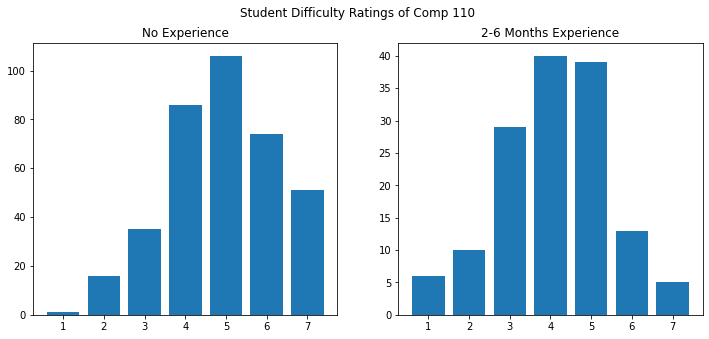

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
fig.suptitle("Student Difficulty Ratings of Comp 110")


axes[0].set_title("No Experience")
axes[0].bar(difficulty_no_exp.keys(), difficulty_no_exp.values())

axes[1].set_title("2-6 Months Experience")
axes[1].bar(difficulty_two_to_six_months.keys(), difficulty_two_to_six_months.values())

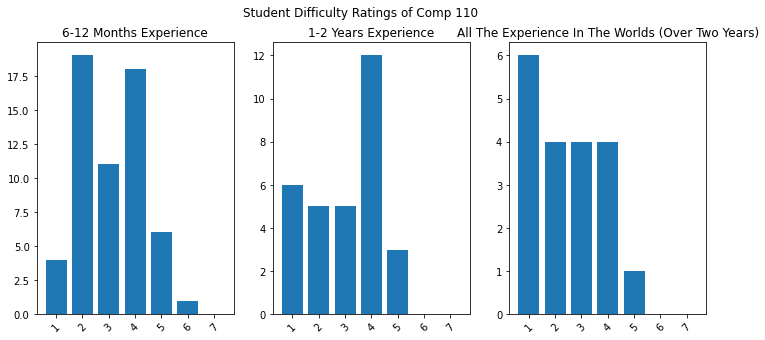

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=False)
fig.suptitle("Student Difficulty Ratings of Comp 110")


axes[0].set_title("6-12 Months Experience")
axes[0].bar(difficulty_seven_to_twelve_months.keys(), difficulty_seven_to_twelve_months.values())

axes[1].set_title("1-2 Years Experience")
axes[1].bar(difficulty_one_to_two_years.keys(), difficulty_one_to_two_years.values())

axes[2].set_title("All The Experience (Over Two Years)")
axes[2].bar(difficulty_over_two_years.keys(), difficulty_over_two_years.values())

### Rinse and repeat for the understanding metric

First, I select the understanding associated with each experience level

In [55]:
understanding_no_exp: dict[str, int] = du.count(no_exp_mask['understanding'])
understanding_two_to_six_months: dict[str, int] = du.count(two_to_six_months_exp_mask['understanding'])
understanding_seven_to_twelve_months: dict[str, int] = du.count(seven_to_twelve_months_exp_mask['understanding'])
understanding_one_to_two_years: dict[str, int] = du.count(one_to_two_years_exp_mask['understanding'])
understanding_over_two_years: dict[str, int] = du.count(over_two_years_exp_mask['understanding'])

Then, I reorganize the keys to make sure they are in ascending order.

In [56]:
order: list[str] = ['1', '2', '3', '4', '5', '6', '7']
understanding_no_exp = du.organize_keys(understanding_no_exp, order)
understanding_two_to_six_months = du.organize_keys(understanding_two_to_six_months, order)
understanding_seven_to_twelve_months = du.organize_keys(understanding_seven_to_twelve_months, order)
understanding_one_to_two_years = du.organize_keys(understanding_one_to_two_years, order)
understanding_over_two_years = du.organize_keys(understanding_over_two_years, order)

Finally, I plot the understanding data.

<BarContainer object of 7 artists>

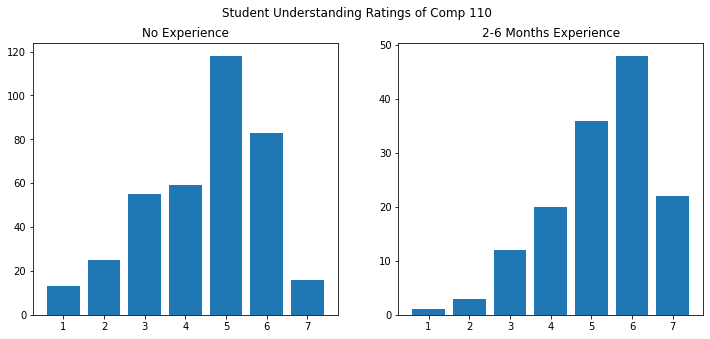

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
fig.suptitle("Student Understanding Ratings of Comp 110")


axes[0].set_title("No Experience")
axes[0].bar(understanding_no_exp.keys(), understanding_no_exp.values())

axes[1].set_title("2-6 Months Experience")
axes[1].bar(understanding_two_to_six_months.keys(), understanding_two_to_six_months.values())

<BarContainer object of 7 artists>

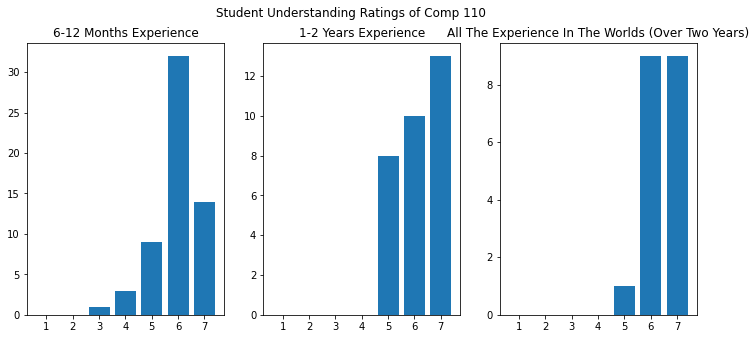

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=False)
fig.suptitle("Student Understanding Ratings of Comp 110")


axes[0].set_title("6-12 Months Experience")
axes[0].bar(understanding_seven_to_twelve_months.keys(), understanding_seven_to_twelve_months.values())

axes[1].set_title("1-2 Years Experience")
axes[1].bar(understanding_one_to_two_years.keys(), understanding_one_to_two_years.values())

axes[2].set_title("All The Experience (Over Two Years)")
axes[2].bar(understanding_over_two_years.keys(), understanding_over_two_years.values())

### Now onto oh_visits

First I sort the data by experience category.

In [59]:
oh_visits_no_exp: dict[str, int] = du.count(no_exp_mask['oh_visits'])
oh_visits_two_to_six_months: dict[str, int] = du.count(two_to_six_months_exp_mask['oh_visits'])
oh_visits_seven_to_twelve_months: dict[str, int] = du.count(seven_to_twelve_months_exp_mask['oh_visits'])
oh_visits_one_to_two_years: dict[str, int] = du.count(one_to_two_years_exp_mask['oh_visits'])
oh_visits_over_two_years: dict[str, int] = du.count(over_two_years_exp_mask['oh_visits'])

Then, I reorganize the data.

In [62]:
order: list[str] = ['0', '1', '2', '3', '4', '5']
oh_visits_no_exp = du.organize_keys(oh_visits_no_exp, order)
oh_visits_two_to_six_months = du.organize_keys(oh_visits_two_to_six_months, order)
oh_visits_seven_to_twelve_months = du.organize_keys(oh_visits_seven_to_twelve_months, order)
oh_visits_one_to_two_years = du.organize_keys(oh_visits_one_to_two_years, order)
oh_visits_over_two_years = du.organize_keys(oh_visits_over_two_years, order)

Finally, I plot the office hour visits data.

<BarContainer object of 6 artists>

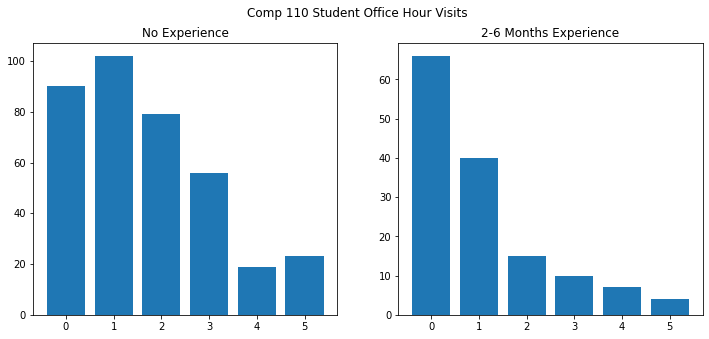

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
fig.suptitle("Comp 110 Student Office Hour Visits")


axes[0].set_title("No Experience")
axes[0].bar(oh_visits_no_exp.keys(), oh_visits_no_exp.values())

axes[1].set_title("2-6 Months Experience")
axes[1].bar(oh_visits_two_to_six_months.keys(), oh_visits_two_to_six_months.values())

<BarContainer object of 6 artists>

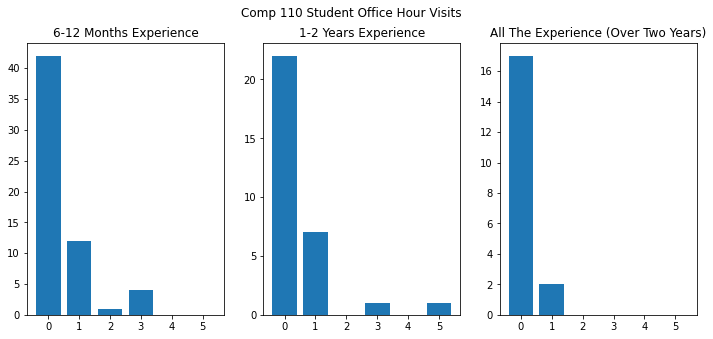

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=False)
fig.suptitle("Comp 110 Student Office Hour Visits")


axes[0].set_title("6-12 Months Experience")
axes[0].bar(oh_visits_seven_to_twelve_months.keys(), oh_visits_seven_to_twelve_months.values())

axes[1].set_title("1-2 Years Experience")
axes[1].bar(oh_visits_one_to_two_years.keys(), oh_visits_one_to_two_years.values())

axes[2].set_title("All The Experience (Over Two Years)")
axes[2].bar(oh_visits_over_two_years.keys(), oh_visits_over_two_years.values())

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



I feel like my data supports the idea that there should be an accelerated class for people with some experience in programming, but don't feel like they have a solid foundation yet. The more experience people had programming, the easier they feel the class is, the more they understand, and the less they reach out for help. This all points to that they feel very comfortable in this class and are not being challenged by the class. The cost of doing this is that there would need to be another section of a comp 110-like class that would cover material faster than comp 110. However, this would definitely free up the class allowing for more people who are interested in the the subject to take this class. Even removing only the 40 most advanced students in this class would allow for 40 more people who would have been shut out of an opportunity to learn some programming into this class. 